# **Tarea 4: Inferencia estadística y pruebas de hipótesis**

## Alumno: José de Jesús Hernández Higuera

### Matrícula: 224470489

# Problema 1:

Los siguientes datos

In [7]:
import numpy as np

x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

*Para estimar los parámetros de la distribución coseno, usaremos el estimador de máxima verosimilitud. Como veremos a continuación, se usará la librería `SciPy` y el módulo `Optimize`. En primer lugar, comenzaremos definiendo la función del logaritmo para el estimador de verosimilitud. Luego, procederemos a utilizar la función `minimize` para obtener los parámetros de escala y localización correspondientes a la distribución.*

In [66]:
from scipy import stats
from scipy.optimize import minimize

def log_ver(par, x): #Definimos la función para el logaritmo del estimador de máxima verosimilitud
    a, b = par
    if a <= 0:  #Evitemos tener escala negativa
        return np.inf
    return -np.sum(np.log(stats.cosine.pdf(x, loc=b, scale=a)))

#La aproximación inicial de los parámetros serán la media (localización) y la desviación estándar (escala)
a_0, b_0 = np.std(x), np.mean(x)
result = minimize(log_ver, [b_0, a_0], args=(x), method='L-BFGS-B', bounds=[(None, None), (1e-6, None)])

#Obtenemos los parámetros estimados a y b
b, a = result.x #colocamos la b primero porque es la localización
print(f"Estimación de parámetros: localización: {b:.2f}, escala: {a:.2f}")

Estimación de parámetros: localización: 2.13, escala: 1.70


<ipython-input-66-fa5c1d455c28>:8: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.cosine.pdf(x, loc=b, scale=a)))


*Obtenemos que $a = 1.70$ y $b = 2.13$ son los parámetros de la muestra dada.*

# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y estima el intervalo de confianza del 95%. 

In [8]:
#Veamos primero el número de elementos en la secuencia de datos
n = len(x)
n

100

*Notemos que el número de muestras que se encuentra en la secuencia de datos colocada al principio es mayor a 30, por lo tanto, podemos considerarlo como una muestra grande. En consecuencia, podemos hacer uso del teorema del límite central. Primero, calculemos el primer momento de la distribución; el promedio.*

In [9]:
x_bar = np.mean(x)
x_bar

2.1342042433999997

*Ahora, calculemos el error estándar y el valor de z para un nivel de confianza del 95%.*

In [11]:
from math import sqrt
from scipy import stats

#Nivel de confianza del intervalo
alfa = 0.05

#Primero obtendremos el error estándar
std = np.std(x) #Desviación estándar
err = std/sqrt(n)    #Error estándar

#Ahora obtendremos el valor para Z
Z = stats.norm.ppf(1 - alfa/2, x_bar, std)

#Calculemos los límites del intervalo
lim_inf = x_bar + Z*err
lim_sup = x_bar - Z*err
print(f'El intervalo de confianza para un {100*(1-alfa):.0f}% es [{lim_sup:.4f}, {lim_inf:.4f}]')

El intervalo de confianza para un 95% es [1.2050, 3.0634]


# Problema 3:
Un fabricante farmacéutico compra materias primas de dos proveedores diferentes. El nivel medio de impurezas es aproximadamente el mismo para ambos proveedores, pero el fabricante está preocupado por la variabilidad en la cantidad de impurezas de entre un embarque y otro. Si el nivel de impurezas tiende a variar en forma excesiva de una fuente de abastecimiento, esto podría afectar la calidad del producto final. Para comparar la variación en el porcentaje de impurezas para los dos proveedores, el fabricante selecciona diez envíos de cada uno de ellos y mide el porcentaje de impurezas de cada envío. Las varianzas muestrales fueron s2 1 = .273 y s2 2 = .094 respectivamente. Forme un intervalo de confianza de 95% para la relación entre las varianzas poblacionales reales.

In [11]:
from scipy import stats

#Definamos los datos:
s2_1 = 0.273
s2_2 = 0.094
n = 10 #tamaño de la muestra
nu = n - 1 #grados de libertad
alpha = 0.05 #nivel de confianza

#Con las varianzas muestrales y los tamaños en las muestras podemos calcular el estadístico F
F = s2_1/s2_2

#Luego, calculemos los valores críticos de la distribución F
inf = stats.f.ppf(1 - alpha / 2, nu, nu)  
sup = stats.f.ppf(alpha / 2, nu, nu)

print(f'El intervalo de confianza es [{F/inf:.4f}, {F*sup:.4f}]')

El intervalo de confianza es [0.7214, 0.7214]


# Problema 4:
Una encuesta a 415 ejecutivos corporativos, de gobierno y contadores de la Financial Accounting Foundation encontró que 278 consideraban el flujo de caja (lo contrario de ganancias por acción, etc.) como el indicador más importante de la salud financiera de una compañía. Suponga que estos 415 ejecutivos constituyen una muestra aleatoria de la población de todos los ejecutivos. Use los datos para hallar un intervalo de confianza de 95% para la fracción de todos los ejecutivos corporativos que consideran que el flujo de caja es la medida más importante de la salud financiera de una compañía.

*Tenemos una muestra de 415 ejecutivos, de los cuales, 278 consideran el flujo de caja como el indicador más importante de la salud financiera de una compañía. Podemos considerar esta situación como experimentos de Bernoulli donde sólo hay dos estados: éxito (que sí consideren a dicho indicador como el más importante) o fracaso(que no lo hagan). Entonces, esto conduce a una distribución binomial, de modo que el intervalo de confianza para $\mu$ es $\mu \epsilon (\hat p - Z_{\alpha/2}\sigma_{\hat p}, \hat p + Z_{\alpha/2}\sigma_{\hat p})$. Recordemos que aquí el parmámetro de la distribución es p.*

In [5]:
from math import sqrt
from scipy import stats

#Definimos los primeras variables
n = 415
k = 278
p_hat = k/n
alpha = 0.05

#Ahora calculemos Z y sigma
sigma = sqrt(p_hat*(1-p_hat)/n)
Z = stats.norm.ppf(1 - alpha/2)

#Finalmente, obtengamos los límites superior e inferior del intervalo de confianza
inf_4 = p_hat - Z*sigma
sup_4 = p_hat + Z*sigma

#Obtengamos el resultado con el enunciado completo
print(f"El intervalo de confianza para la media de ejecutivos corporativos con la consideración mencionada es ({inf_4:.4f}, {sup_4:.4f}).")

El intervalo de confianza para la media de ejecutivos corporativos con la consideración mencionada es (0.6246, 0.7151).


*Notemos que, en este caso, el promedio muestral $\dfrac{278}{415} \approx 0.6699$ efectivamente se encuentra dentro del intervalo de confianza.*

# Problema 5:
Se sabe que la probabilidad p de obtener una cara al lanzar al aire una moneda desbalanceada es 1/ 4 o 3/ 4. La moneda es lanzada dos veces al aire y se observa un valor para Y, el número de caras. Para cada valor posible de Y, ¿cuál de los dos valores para p (1/ 4 o 3/ 4) maximiza la probabilidad de que Y = y? Dependiendo del valor de y observado realmente, En otras palabras ¿cuál es el MLE de p?

In [67]:
#Contruyamos una muestra de 100 tiradas para tener algunos datos de cada moneda
from scipy.stats import bernoulli
p1= 1/4  #primer valor probable
p2 = 3/4 #segundo valor probable
fp1 = bernoulli(p1) #creamos una distribucion de bernoulli
fp2 = bernoulli(p2)
mue1 = fp1.rvs(100) #tomamos una muestra de 100 elementos
mue2 = fp2.rvs(100)

In [68]:
import sympy
import numpy as np

#Definimos las variables simbólicas p y k
p = sympy.symbols('p', positive=True, real=True)
k = sympy.symbols('k', integer=True, positive=True)

#Creamos la función de verosimilitud para la distribución binomial
L = sympy.binomial(2, k) * p**k * (1-p)**(2-k) #El número 2 proviene de los 2 lanzamientos de la moneda

#Proponemos una función de verosimilitud para cada valor de p
L1=np.prod([L.subs(k,i) for i in mue1])
L2=np.prod([L.subs(k,i) for i in mue2])

#Aplicamos el logaritmo a cada función anterior
logL1 = sympy.log(L1)
logL2 = sympy.log(L1)

#Derivemos con respecto a p e igualamos a cero
p_hat1 = sympy.solve(sympy.diff(logL1, p), p)[0]
p_hat2 = sympy.solve(sympy.diff(logL2, p), p)[0]

print(p_hat1, p_hat2)



21/200 21/200


*Por lo tanto, ambos valores de p maximizan la probabilidad de que $Y=k$.*

# Problema 6:
Un examen de lectura se aplica a alumnos de sexto año en tres grandes escuelas primarias. Se considera que las calificaciones del examen en cada escuela tienen distribuciones normales con medias desconocidas $\mu_1, \mu_2, \mu_3$, respectivamente, y varianza común desconocida $\sigma^2(\sigma²_1 = \sigma²_2 = \sigma^2_3 = \sigma^2)$. Usando los datos de la tabla siguiente en muestras aleatorias independientes de cada escuela, pruebe si existe evidencia de una diferencia entre m1 y m2. Use a = .05.

Escuela I : $n_{1} = 10, \sum x_{i}^{2} = 36950 , \bar{x}= 60$
Escuela II : $n_{2} = 10, \sum y_{i}^{2} = 25850 , \bar{y}= 50$
Escuela III : $n_{3} = 10, \sum w_{i}^{2} = 49900 , \bar{x}= 70$


*Los datos provienen de una distribución normal y las muestras son pequeñas, por lo que es conveniente hacer una prueba de hipótesis para dos medias poblacionales. Donde:*

*$H_0$: no hay diferencia entre $\mu_1$ y $\mu_2$, esto es, $\mu_1 - \mu_2 = 0$*

*$H_a$: la diferencia entre ambas medias existe, es decir, $\mu_1 - \mu_2 \neq 0$*

In [6]:
from math import sqrt
from scipy import stats

#Coloquemos los datos conocidos
alfa = 0.05 #Nivel de confianza de la prueba
n = 10 #Número de alumnos (es el mismo para todas las escuelas)
gdl = 2*n - 2 #Grados de libertad
sum_x2 = 36950 #suma de los datos elevada al cuadrado
sum_y2 = 25850
x_1 = 60 #Promedio de la calificación del examen
x_2 = 50
s2_1 = (sum_x2/n) - x_1 #Cálculo para la varianza muestral 
s2_2 = (sum_y2/n) - x_2
S_p = sqrt((s2_1 + s2_2)/2) #Luego calculemos Sp (la ecuación está simplificada)
T = (x_1 - x_2)/(S_p*sqrt(2/n)) #Estadístico T (de nuevo, la ecuación se ha simplificado)
t = stats.t.isf(1 - alfa/2, gdl) #valor de la función delimitado por alfa

#La región de rechazo es |T| > t_alfa/2:
if abs(T) > t:
    print("Se rechaza H_0")
else:
    print("Se acepta H_0")


Se rechaza H_0


*Por lo tanto, se puede concluir que existe evidencia en los datos que nos hable sobre una diferencia entre las medias 1 y 2.*

# Problema 7:
¿Qué eficiencia de combustión debe esperar el propietario de una casa de un horno de petróleo? La EPA indica que 80% o más es excelente, 75% a 79% es buena, 70% a 74% es regular y debajo de 70% es mala. Un contratista de sistemas de calefacción doméstica, que vende dos marcas de calentadores de petróleo (llamémosles A y B) decidió comparar sus eficiencias medias al analizar las eficiencias de 8 calentadores del tipo A y 6 del tipo B. Los porcentajes de eficiencia resultantes para los 14 calentadores se muestran en la tabla siguiente.

Tipo A 72 78 73 69 75 74 69 75

Tipo B 78 76 81 74 82 75

a ¿Los datos proporcionan suficiente evidencia para indicar una diferencia en las eficiencias medias para las dos marcas de calentadores domésticos? Encuentre el valor p aproximado para la prueba e interprete su valor. 

b Determine un intervalo de confianza de 90% para (mA − mB) e interprete el resultado.

*Comenzaremos notando que las muestras de los datos son muy pequeñas, menores a 30, de modo que será útil utilizar una prueba para el caso apropiado como lo es la prueba t de Student. Adicionalmente, para poder hacer esto, supondremos que las varianzas de ambos grupos son iguales. Una vez visto eso, pasamos a determinar las hipótesis para la prueba:*

*$H_0$: las eficiencias medias de los dos grupos son iguales ($\mu_A = \mu_B$)*

*$H_1$: hay una diferencia entre las eficiencias medias ($\mu_A \neq \mu_B$)*

In [38]:
import numpy as np
from scipy import stats

#Comencemos definiendo los datos
Tipo_A = np.array([72, 78, 73, 69, 75, 74, 69, 75])
Tipo_B = np.array([78, 76, 81, 74, 82, 75])

#Hagamos la prueba t de Student para muestras independientes y obtengamos el valor del estadístico t y el valor p
t_stat, p_value = stats.ttest_ind(Tipo_A, Tipo_B, equal_var=True)

#Fijemos el nivel de significancia
alfa = 0.05
if p_value < alfa:
    print('Se rechaza H_0')
else:
    print('Se acepta H_0')

Se rechaza H_0


*a) Dado que el valor p es menor que el valor de significancia de la prueba, se puede afirmar que hay evidencia de que las eficiencias medias de ambas marcas de calentadores son significativamente distintas.*

In [41]:
#Calculemos los elementos necesarios para obtener el intervalo de confianza
n_A = len(Tipo_A)
n_B = len(Tipo_B)
xA_bar = np.mean(Tipo_A)
xB_bar = np.mean(Tipo_B)
dif = xA_bar - xB_bar
var_A = np.var(Tipo_A, ddof=1)
var_B = np.var(Tipo_B, ddof=1)
gdl = n_A + n_B - 2     #grados de libertad

#Ahora, obtengamos el error estándar SE:
SE = np.sqrt(var_A/n_A + var_B/n_B)

#El valor del estadístico t estaría dado de la forma
t_val = stats.t.ppf(1 - alfa/2, gdl)

print(f'[{(dif - t_val*SE):.2f}, {(dif + t_val*SE):.2f}]')

[-8.30, -0.79]


*b) Por lo tanto, $(\mu_A - \mu_B) \epsilon [-8.3, -0.79]$. Notemos que este intevalo no contiene al cero, comprobando el inciso anterior donde dijimos que las eficiencias medias son diferentes, es decir que $\mu_A \neq \mu_B$, o bien que $\mu_A - \mu_B \neq 0$.*

# Problema 8: 
Los datos de la siguiente tabla muestran lecturas en pies-libras de la resistencia al impacto de dos clases de material de empaque, tipo A y tipo B. Determine si la información sugiere una diferencia en la resistencia media entre las dos clases de material. Realice la prueba con un nivel de significancia a = .10.

A     &nbsp; B \
1.25 &nbsp; .89 \
1.16 &nbsp; 1.01 \
1.33 &nbsp; .97 \
1.15 &nbsp; .95 \
1.23 &nbsp; .94 \
1.20 &nbsp; 1.02 \
1.32 &nbsp; .98 \
1.28 &nbsp; 1.06 \
1.21 &nbsp; .98


*Partimos de suponer que los datos provienen de una distribución normal. Luego, al tener muestras pequeñas de datos, podemos hacer una prueba de hipótesis para dos muestras poblacionales.*

*$H_0$: no hay diferencia entre $\mu_1$ y $\mu_2$, esto es, $\mu_1 - \mu_2 = 0$*

*$H_a$: la diferencia entre ambas medias existe, es decir, $\mu_1 - \mu_2 \neq 0$*

In [35]:
import numpy as np
from math import sqrt

#Definamos las listas de datos para cada material
A = np.array([1.25, 1.16, 1.33, 1.15, 1.23, 1.2, 1.32, 1.28, 1.21])
B = np.array([0.89, 1.01, 0.97, 0.95, 0.94, 1.02, 0.98, 1.06, 0.98])

n = len(A)  #Número de muestras (notemos que son las mismas para ambos materiales)
alfa = 0.1  #Nivel de confianza de la prueba
gdl = 2*n - 2   #Grados de libertad
prom_A = np.mean(A) #Promedio del material A
prom_B = np.mean(B)
s2_A = np.var(A, ddof=1)    #Varianza muestral para el material A
s2_B = np.var(B, ddof=1)

#Calculemos Sp con la fórmula simplificada del ejercicio 6
s_p = sqrt((s2_A + s2_B)/2)

T = (prom_A - prom_B)/(s_p*sqrt(2/n)) #Estadístico T (de nuevo, la ecuación se ha simplificado)
t = stats.t.isf(1 - alfa/2, gdl) #valor de la función delimitado por alfa

#La región de rechazo es |T| > t_alfa/2:
if abs(T) > t:
    print("Se rechaza H_0")
else:
    print("Se acepta H_0")

Se rechaza H_0


*Por lo tanto, sí tenemos evidencia de que exista diferencia entre las resistencias medias de cada material.*

# Problema 9:
Los datos de la siguiente tabla proporcionan las millas por galón recorridas por un automóvil de prueba cuando utiliza gasolinas de niveles variables de octanaje.

Millas por galón (y) &nbsp; Octano (x) \
13.0 &nbsp;89 \
13.2 &nbsp;93 \
13.0 &nbsp;87 \
 13.6 &nbsp;90 \
13.3 &nbsp;89 \
 13.8 &nbsp;95  \
 14.1 &nbsp;100 \
 14.0 &nbsp;98

 a) Calcule el valor de r. 
 
 b) ¿Los datos dan suficiente evidencia para indicar que el nivel de octanaje y las millas por galón son dependientes? Obtenga el nivel de significancia alcanzado, e indique su conclusión si desea realizar una prueba en el nivel de a = .05.

In [7]:
import numpy as np
from math import sqrt

#Comencemos por realizar las listas donde los datos están almacenados
mill = np.array([13, 13.2, 13, 13.6, 13.3, 13.8, 14.1, 14])
octa = np.array([89, 93, 87, 90, 89, 95, 100, 98])
n = len(mill)

#Calculemos los elementos necesarios para calcular r
s_xx = sum([(x - np.mean(mill))**2 for x in mill])
s_yy = sum([(y - np.mean(octa))**2 for y in octa])
s_xy = sum([(mill[i] - np.mean(mill))*(octa[i] - np.mean(octa)) for i in range(n)])

#Por último, obtengamos r
r = s_xy/sqrt(s_xx * s_yy)
print(f'a) El valor de r es de {r:.4f}')

a) El valor de r es de 0.8914


In [10]:
from scipy import stats
#Hagamos una prueba de hipótesis para saber si las millas y el octanaje son dependientes
#H_0: rho = 0, H_a: rho > 0
#Calculemos el estadístico de prueba
t = (r*sqrt(n-2))/sqrt(1-r**2)

#Sea alfa = 0.05
c = stats.t.isf(0.05, n-2)

#Planteemos el resultado de la prueba de hipótesis
if abs(t) > c:
    print("b) Las millas y el octanaje son dependientes")
else:
    print("b) Las millas y el octanaje son independientes")

b) Las millas y el octanaje son dependientes


*Por lo tanto, se puede concluir que hay evidencia suficiente para decir que las millas y el nivel de octanaje son dependientes.*

# Problema 10:
Se realizó un experimento para determinar el efecto de presión y temperatura en el rendimiento de una sustancia química. Se emplearon dos niveles de presión (en libras por pulgada cuadrada, psi) y tres de temperatura:

Presión: 50 , 80
Temperatura (F) : 100, 200, 300

Una prueba del experimento en cada combinación de temperatura-presión dio como resultado los datos que aparecen en la siguiente tabla.

Rendimiento &nbsp; Presión &nbsp; Temperatura\
21 &nbsp;50&nbsp; 100 \
23 &nbsp;50 &nbsp;200 \
26 &nbsp;50 &nbsp;300 \
22 &nbsp;80 &nbsp;100 \
23 &nbsp;80 &nbsp;200 \
28 &nbsp;80&nbsp; 300

a Ajuste el modelo $Y = \beta_{0} +\beta_1x_1 +\beta_2x_2 +\beta_3x_2^{2} + \epsilon$, donde $x_1$ = presión y $x_2$ = temperatura. 

b Compruebe si $\beta_3$ difiere considerablemente de cero, con $\alpha$ = .05. 

c Pruebe la hipótesis de que la temperatura no afecta el rendimiento, con $\alpha$ = .05.

In [13]:
import numpy as np
from numpy.linalg import inv

#El vector Y representa el Rendimiento
Y = np.array([21, 23, 26, 22, 23, 28])

#Definimos la matriz X
X = np.array([[1, 50, 100, 10000], [1, 50, 200, 20000], [1, 50, 300, 30000],
              [1, 80, 100, 10000], [1, 80, 200, 20000], [1, 80, 300, 30000]]) #Las columnas son b_0, presión, temperatura, temperatura^2

#Y luego su transpuesta
X_tra = X.T

#Calculemos el vector beta gorro
beta_hat = np.dot(inv((np.dot(X_tra, X))), np.dot(X_tra, Y))
print(beta_hat)

[16.16666667  0.03333333  0.0275      0.        ]


*a) El modelo ajustado es $\hat Y = 16.17 - 0.033 x_1 - 0.0275 x_2$*

*Ahora comprobaremos si es que el valor de $\beta_3$ difiere significativamente de 0 teniendo un nivel de significancia de 0.05. Para ello, utilizaremos la librería `statsmodels` de tal forma que, al final, podremos obtener un resumen que incluye los valores p para los coeficientes $\beta$. Si el valor p es menor al nivel de significancia, entonces el coeficiente es significativamente diferente de cero.*

In [19]:
import statsmodels.api as sm
import pandas as pd

#Hagamos los arreglos para la presión (x1) y la temperatura (x2)
x1 = np.array([50, 50, 50, 80, 80, 80])
x2 = np.array([100, 200, 300, 100, 200, 300])
x2_2 = np.array([i**2 for i in x2])

#La siguiente expresión reoresenta la relación entre los coeficientes y los datos
mod = 16.17 - 0.033 * x1 - 0.0275 * x2 + 0 * x2_2 + Y

#Creamos un dataframe con los datos correspondientes
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x2^2':x2_2, 'Y': Y})

#Añadimos una constante al modelo 
X = sm.add_constant(data[['x1', 'x2', 'x2^2']])

#Ajustemos el modelo y obtengamos el resumen que nos indicará el valor p de cada constante
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     22.56
Date:                Mon, 18 Nov 2024   Prob (F-statistic):             0.0428
Time:                        20:36:37   Log-Likelihood:                -3.1384
No. Observations:                   6   AIC:                             14.28
Df Residuals:                       2   BIC:                             13.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3333      2.513      8.091      0.0

C:\Users\quech\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


*b) Como se dijo anteriormente, si $p-value < \alpha$, entonces el coeficiente es significativamente diferente de cero. En la tabla podemos ver que la columna $P>|t|$ nos indica este valor en el renglón x2^2; dado que $0.178 > 0.05$, entonces podemos concluir que el valor de la constante es cercano a 0. Incluso, en el intervalo de confianza obtenido al lado, se muestra que no hay intervalo, el valor es directamente cero (lo cual corrobora el resultado del ajuste hecho en el inciso anterior).*

**Nota**: *veamos que, de paso, el resto de los coeficientes están corroborados con el mismo método; en el término constante $p < |t|$, así que es significativamente distinto de cero (lo cual es correcto para 16.17). Por el contrario, en el caso de los coeficientes para $x_1$ y $x_2$, se nota que los coeficientes con cercanos a cero (que es acertado para -0.033 y -0.0275). Esto tiene implicaciones en el siguiente inciso*

*Finalmente, podemos formular las hipótesis de la siguiente manera:*

*$H_0$: no hay relación entre la temperatura y el rendimiento (es decir, $\beta_2 = 0$)*

*$H_1$: la temperatura afecta al rendimiento (esto es $\beta_2 \neq 0$)*

*c) Como vimos anteriormente, el hecho de que el valor p sea mayor que el nivel de significancia, nos indica debemos aceptar la hipótesis nula, concluyendo que la temperatura no afecta al rendimiento.*

# Problema 11:
Los datos de la siguiente tabla provienen de la comparación de los porcentajes de crecimiento para bacterias tipos A y B. El crecimiento Y registrado en cinco puntos igualmente espaciados (y codificados) de tiempo se muestra en la tabla.

Tiempo codificado : -2, -1, 0 , 1, 2 \
Bacteria A : 8.0, 9.0, 9.1 , 10.2, 10.4\
Bacteria B : 10.0, 10.3, 12.2, 12.6, 13.9

a Ajuste el modelo lineal $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$ a los n = 10 puntos. Sea $x_1$ = 1 si el punto se refiere a bacterias tipo B y sea $x_1$ = 0 si el punto se refiere al tipo A. Sea $x_2$ = tiempo codificado. 

b Grafique los puntos y las dos rectas de crecimiento. Observe que b3 es la diferencia entre las pendientes de las dos rectas y representa la interacción tiempo-bacteria. 

c Prediga el crecimiento del tipo A en el tiempo $x_2$ = 0 y compare la respuesta con la gráfica. Repita el proceso para el tipo B.

d ¿Los datos presentan suficiente evidencia para indicar una diferencia en los porcentajes de crecimiento para los dos tipos de bacteria?

In [20]:
import numpy as np
from numpy.linalg import inv

Y11 = np.array([8, 9, 9.1, 10.2, 10.4, 10, 10.3, 12.2, 12.6, 13.9])

X11 = np.array([[1, 0, -2, 0], [1, 0, -1, 0], [1, 0, 0, 0], [1, 0, 1, 0], [1, 0, 2, 0],
              [1, 1, -2, -2], [1, 1, -1, -1], [1, 1, 0, 0], [1, 1, -1, -1], [1, 1, -2, -2]])

X_tra11 = X11.T

#Calculemos el vector beta gorro
beta_hat11 = np.dot(inv((np.dot(X_tra11, X11))), np.dot(X_tra11, Y11))
print(beta_hat11)

[ 9.34        2.50285714  0.6        -0.56428571]


*a) El modelo ajustado corresponde a $\hat Y = 9.34 + 2.503 x_1 + 0.6 x_2 - 0.5643 x_1 x_2$*

*Para graficar las rectas de crecimiento, primero haremos dos ajustes simples; una para cada tipo de bacteria. Cada recta tendrá la forma $ Y = \beta_0 + \beta_1 x + \epsilon $, donde Y será el porcentaje de crecimiento del grupo de bacterias correspondiente y x el tiempo codificado.*

In [21]:
Bac_A = np.array([8, 9, 9.1, 10.2, 10.4])
Bac_B = np.array([10, 10.3, 12.2, 12.6, 13.9])
Tiem = np.array([-2, -1, 0, 1, 2])

#Comencemos con la recta de las bacterias A
SA_xy = np.sum(np.array([Tiem[i]*Bac_A[i] for i in range(5)])) - (1/len(Bac_A))*np.sum(Bac_A)*np.sum(Tiem)
SA_xx = np.sum(np.array([Tiem[i]**2 for i in range(5)])) - (1/len(Tiem))*np.sum(Tiem)**2

beta_A1 = SA_xy/SA_xx

beta_A0 = np.mean(Bac_A) - beta_A1*np.mean(Tiem)

print(beta_A1, beta_A0)

0.6 9.34


*La recta para las bacterias de tipo A es $\hat Y_A = 0.6 x + 9.34$*

In [22]:
#Hagamos lo mismo para las bacterias de tipo B
SB_xy = np.sum(np.array([Tiem[i]*Bac_B[i] for i in range(5)])) - (1/len(Bac_B))*np.sum(Bac_B)*np.sum(Tiem)
SB_xx = np.sum(np.array([Tiem[i]**2 for i in range(5)])) - (1/len(Tiem))*np.sum(Tiem)**2

beta_B1 = SB_xy/SB_xx

beta_B0 = np.mean(Bac_B) - beta_B1*np.mean(Tiem)

print(beta_B1, beta_B0)

1.0099999999999998 11.8


*La recta para las bacterias de tipo B es $\hat Y_B = 1.01 x + 11.8$*

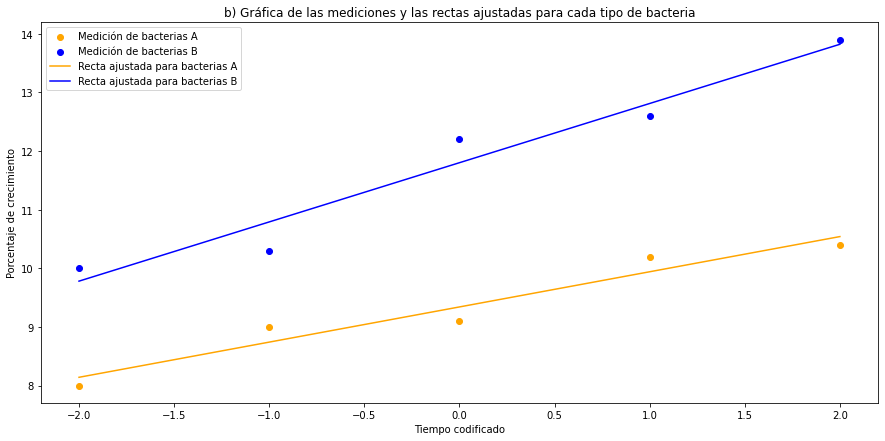

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.scatter(Tiem, Bac_A, color='orange', label='Medición de bacterias A')
plt.scatter(Tiem, Bac_B, color='blue', label='Medición de bacterias B')
plt.plot(Tiem, [0.6*j + 9.34 for j in Tiem], color='orange', label='Recta ajustada para bacterias A')
plt.plot(Tiem, [1.01*j + 11.8 for j in Tiem], color='blue', label='Recta ajustada para bacterias B')
plt.title('b) Gráfica de las mediciones y las rectas ajustadas para cada tipo de bacteria')
plt.xlabel('Tiempo codificado')
plt.ylabel('Porcentaje de crecimiento')
plt.legend()
plt.show()


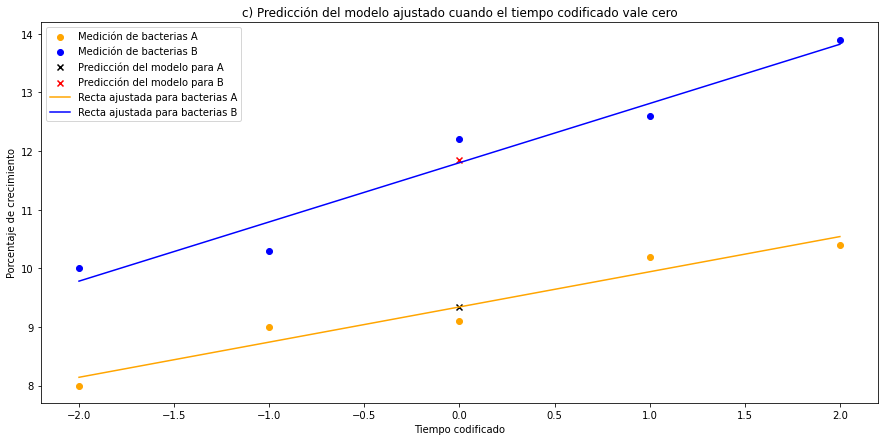

In [32]:
import matplotlib.pyplot as plt

#Predicción para las bacterias de tipo A cuando el tiempo es 0
Y_pred_A = 9.34 + 2.503*0 + 0.6*0 - 0.5643*0*0 #Recordemos que x_1 es 0 cuando nos referimos a las bacterias tipo A

#Predicción para las bacterias de tipo B
Y_pred_B = 9.34 + 2.503*1 + 0.6*0 - 0.5643*1*0

#Comparemos estos valores con los de la gráfica
plt.figure(figsize=(15,7))
plt.scatter(Tiem, Bac_A, color='orange', label='Medición de bacterias A')
plt.scatter(Tiem, Bac_B, color='blue', label='Medición de bacterias B')
plt.scatter(0, Y_pred_A, color='black', label='Predicción del modelo para A', marker='x')
plt.scatter(0, Y_pred_B, color='red', label='Predicción del modelo para B', marker='x')
plt.plot(Tiem, [0.6*j + 9.34 for j in Tiem], color='orange', label='Recta ajustada para bacterias A')
plt.plot(Tiem, [1.01*j + 11.8 for j in Tiem], color='blue', label='Recta ajustada para bacterias B')
plt.title('c) Predicción del modelo ajustado cuando el tiempo codificado vale cero')
plt.xlabel('Tiempo codificado')
plt.ylabel('Porcentaje de crecimiento')
plt.legend()
plt.show()

*c) Podemos notar que las predicciones hechas por el modelo son muy cercanas tanto a los modelos individuales de cada tipo de bacterias como a los datos reales provenientes de las mediciones.*

*Partimos de suponer que los datos provienen de una distribución normal. Luego, al tener muestras pequeñas de datos, podemos hacer una prueba de hipótesis para dos muestras poblacionales. Pretendemos mostrar si es que existe una diferencia entre las medias de los porcentajes de crecimiento. Formularemos las siguientes hipótesis:*

*$H_0$: no hay diferencia entre $\mu_1$ y $\mu_2$, esto es, $\mu_1 - \mu_2 = 0$*

*$H_a$: la diferencia entre ambas medias existe, es decir, $\mu_1 - \mu_2 \neq 0$*

In [37]:
from math import sqrt

n = len(Bac_A) #Número de mediciones (es el mismo para ambos tipos de bacterias)
alfa = 0.05  #Nivel de confianza de la prueba
gdl = 2*n - 2   #Grados de libertad
Prom_A = np.mean(Bac_A)     #Promedios muestrales
Prom_B = np.mean(Bac_B)
s2_A = np.var(A, ddof=1)    #Varianza muestral
s2_B = np.var(B, ddof=1)

#Calculemos Sp con la fórmula simplificada del ejercicio 6
s_p = sqrt((s2_A + s2_B)/2)

T = (Prom_A - Prom_B)/(s_p*sqrt(2/n)) #Estadístico T (de nuevo, la ecuación se ha simplificado)
t = stats.t.isf(1 - alfa/2, gdl) #valor de la función delimitado por alfa

#La región de rechazo es |T| > t_alfa/2:
if abs(T) > t:
    print("Se rechaza H_0")
else:
    print("Se acepta H_0")

Se rechaza H_0


*d) Por lo tanto, concluimos que sí hay una diferencia entre las medias poblacionales de los porcentajes de crecimiento de cada tipo de bacteria.*

# Problema 12:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

*Elgiremos el nivel de significancia usual que es de 0.05.*

In [2]:
import pandas as pd
from scipy.stats import f_oneway 

#Comencemos por leer los datos
datos = pd.read_csv('datos.csv')

#Es conveniente separar los datos de cada grupo
A = datos[datos['Grupo'] == 'Grupo A']['Datos']
B = datos[datos['Grupo'] == 'Grupo B']['Datos']

#Hagamos la prueba ANOVA. La función f_oneway nos devolverá el valor del estadístico F y el valor p
resultado = f_oneway(A, B)

#Veamos el resultado
resultado


F_onewayResult(statistic=0.017511360676141122, pvalue=0.8973476766572029)

*Notemos que el nivel de significancia es mucho menor que el valor p, esto implica que no hay suficientes pruebas que indiquen que hay una diferencia estadísticamente significativa entre las calificaciones de los dos grupos.*

# Problema 13:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Haz una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

In [29]:
pip install --upgrade seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


*En primer lugar, haremos la prueba gráfica. Para ello haremos un histograma con curva normal. En este gráfico observaremos el histograma de los datos junto con la curva representativa de la distribución normal. Si las barras del histograma siguen una forma parecida a la de la campana, entonces podemos decir que los datos vienen de una distribución normal. De lo contrario, podríamos tener un indicador de que los datos no provienen de dicha distribución.*

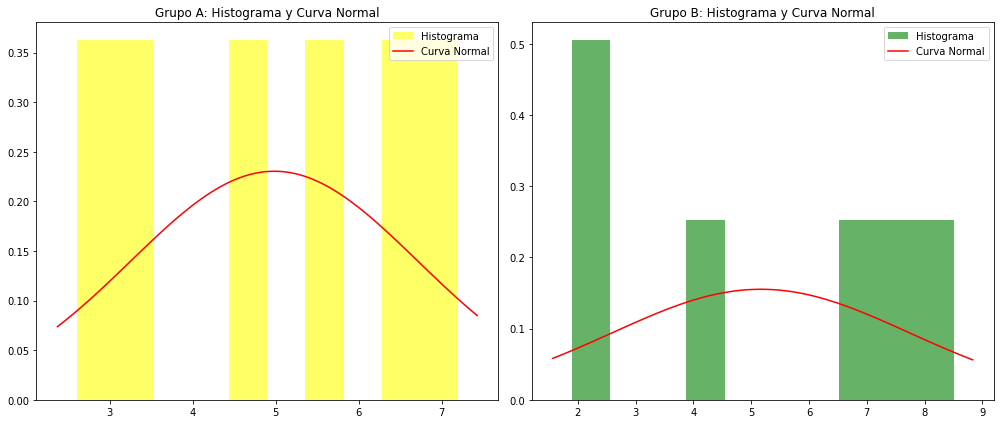

In [6]:
#Hagamos una prueba gráfica
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

#Histograma con curva de densidad normal
plt.figure(figsize=(14, 6))

#Prueba gráfica para el grupo A 
plt.subplot(1, 2, 1)
plt.hist(A, bins=10, density=True, alpha=0.6, color='yellow', label='Histograma')
xmin, xmax = plt.xlim()
x_vals = np.linspace(xmin, xmax, 100)
plt.plot(x_vals, stats.norm.pdf(x_vals, np.mean(A), np.std(A)), 'r-', label='Curva Normal')
plt.title('Grupo A: Histograma y Curva Normal')
plt.legend()

#Misma prueba para el grupo B
plt.subplot(1, 2, 2)
plt.hist(B, bins=10, density=True, alpha=0.6, color='green', label='Histograma')
xmin, xmax = plt.xlim()
x_vals = np.linspace(xmin, xmax, 100)
plt.plot(x_vals, stats.norm.pdf(x_vals, np.mean(B), np.std(B)), 'r-', label='Curva Normal')
plt.title('Grupo B: Histograma y Curva Normal')
plt.legend()

plt.tight_layout()
plt.show()

*Como podemos ver, las barras en el histograma no siguen la forma establecida por la distribución normal. Por lo tanto, por medio de esta prueba gráfica y por el momento, podríamos decir que las calificaciones no provienen de una distribución de este tipo. A continuación, procederemos con la prueba de hipótesis hecha con la prueba de Shapiro-Wilk:*

*$H_0$: las calificaciones de los dos grupos provienen de una distribución normal*

*$H_1$: las calificaciones no provienen de una distribución normal*

In [7]:
from scipy.stats import shapiro

stat_a, p_a = shapiro(A)
stat_b, p_b = shapiro(B)

#Proponemos un nivel de significancia de 5%
alfa = 0.05
if p_a > alfa:
    print('No se rechaza la hipótesis nula para el grupo A')
else:
    print('Se rechaza la hipótesis nula para el grupo A')

if p_b > alfa:
    print('No se rechaza la hipótesis nula para el grupo B')
else:
    print('Se rechaza la hipótesis nula para el grupo B')

No se rechaza la hipótesis nula para el grupo A
No se rechaza la hipótesis nula para el grupo B


*a) Por lo tanto, aceptamos la hipótesis nula y podemos decir que los datos presentan evidencia de que provienen de una distribución normal.*

*Ahora hagamos la prueba con estadística no paramétrica. Para ello utilizaremos la prueba de Mann-Whitney U con las siguientes hipótesis:*

*$H_0$: no hay diferencia entre las medianas de ambos grupos*

*$H_1$: existe diferencia entre las medianas*

In [12]:
from scipy.stats import mannwhitneyu

#Realicemos la prueba para ver si hay cualquier tipo de diferencia entre las medianas
stat, p = mannwhitneyu(A, B, alternative='two-sided')

#Definamos el nivel de significancia del 5%
alfa = 0.05
if p > alfa:
    print('No se rechaza la hipótesis nula')
else:
    print('Se rechaza la hipótesis nula')

No se rechaza la hipótesis nula


*b) Por lo tanto, podemos decir que no hay evidencia que indique que hay una diferencia significativa entre las medianas de ambos grupos.*